# Mood classfication using CNN (HAPPY / SAD)

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from  tensorflow.keras.models  import Sequential
from  tensorflow.keras.layers import Conv2D
from  tensorflow.keras.layers import MaxPool2D
from  tensorflow.keras.layers import Flatten 
from  tensorflow.keras.layers import Dense


import numpy as np
import cv2
import os
import warnings
warnings.filterwarnings("ignore")

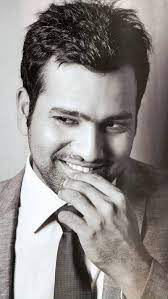

In [9]:
image1=image.load_img(r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\training\happy face\download.jpg")
image1

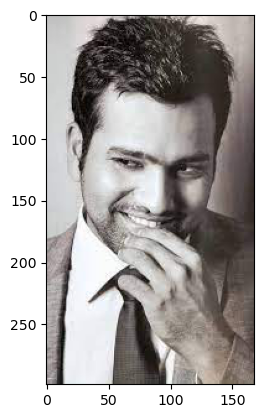

In [3]:
plt.imshow(image1)

In [8]:
i1=cv2.imread(r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\training\happy face\download.jpg")
i1

array([[[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [167, 172, 181],
        [173, 178, 187],
        [178, 183, 192]],

       [[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [165, 170, 179],
        [170, 175, 184],
        [175, 180, 189]],

       [[192, 192, 192],
        [192, 192, 192],
        [192, 192, 192],
        ...,
        [162, 167, 176],
        [165, 170, 179],
        [170, 175, 184]],

       ...,

       [[149, 146, 155],
        [147, 144, 153],
        [140, 138, 144],
        ...,
        [117, 127, 137],
        [123, 133, 143],
        [ 90, 100, 110]],

       [[149, 146, 155],
        [147, 144, 153],
        [140, 138, 144],
        ...,
        [117, 127, 137],
        [122, 132, 142],
        [ 91, 101, 111]],

       [[149, 146, 155],
        [147, 144, 153],
        [140, 138, 144],
        ...,
        [116, 127, 135],
        [120, 131, 139],
        [ 93, 104, 112]]

In [10]:
i1.shape

(299, 168, 3)

In [11]:
train=ImageDataGenerator(rescale=1/255)
validataion=ImageDataGenerator(rescale=1/255)

In [26]:
train_dataset=train.flow_from_directory(r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\training",
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode="binary")
# validataion_dataset=test.flow_from_directory(r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\validation",
#                                       target_size=(200,200),
#                                       batch_size=3,
#                                       class_mode="binary")


Found 12 images belonging to 2 classes.


In [27]:
train_dataset.class_indices

{'happy face': 0, 'sad face': 1}

In [28]:
dir(train_dataset)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_filepaths',
 '_flow_index',
 '_get_batches_of_transformed_samples',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_set_index_array',
 'allowed_class_modes',
 'batch_index',
 'batch_size',
 'class_indices',
 'class_mode',
 'classes',
 'color_mode',
 'data_format',
 'directory',
 'dtype',
 'filenames',
 'filepaths',
 'image_data_generator',
 'image_shape',
 'index_array',
 'index_generator',
 'interpolation',
 'keep_aspect_ratio',
 'labels',
 'lock',
 'n',
 'next',
 'num_classes',
 'on_epoch_end',
 'reset',
 'sample_weight',
 'samples',
 'save_format'

In [29]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [30]:
model=Sequential([ Conv2D(16,(3,3),activation="relu",input_shape=(200,200,3)),
                   MaxPool2D(2,2),
                   Conv2D(32,(3,3),activation="relu"),
                   MaxPool2D(2,2),
                   Conv2D(64,(3,3)),
                   MaxPool2D(2,2),
                   Flatten(),
                   Dense(512,activation="relu"),
                   Dense(1,activation= 'sigmoid')
                ]       
                )
                 

In [31]:
model.compile(loss="binary_crossentropy",
              optimizer ="rmsprop",
              metrics=["accuracy"]
             )

In [32]:
model.fit(train_dataset,
          steps_per_epoch=3,
          epochs=20,
#           validation_data = validataion_dataset
         )

Epoch 1/20
3/3 [==============================] - 2s 207ms/step - loss: 6.0815 - accuracy: 0.6667
Epoch 2/20
3/3 [==============================] - 1s 195ms/step - loss: 2.7770 - accuracy: 0.5556
Epoch 3/20
3/3 [==============================] - 1s 282ms/step - loss: 2.0711 - accuracy: 0.5556
Epoch 4/20
3/3 [==============================] - 1s 277ms/step - loss: 0.7778 - accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 1s 196ms/step - loss: 0.5597 - accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 1s 193ms/step - loss: 0.4867 - accuracy: 0.6667
Epoch 7/20
3/3 [==============================] - 1s 268ms/step - loss: 0.1217 - accuracy: 1.0000
Epoch 8/20
3/3 [==============================] - 1s 190ms/step - loss: 0.0605 - accuracy: 1.0000
Epoch 9/20
3/3 [==============================] - 1s 188ms/step - loss: 0.0773 - accuracy: 1.0000
Epoch 10/20
3/3 [==============================] - 1s 191ms/step - loss: 0.0741 - accuracy: 1.0000
Epoch 11/20
3/3 [==

In [34]:
dir_path=r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\testing"
for i in os.listdir(dir_path):
    print(i)

download (1).jpg
download (12).jpg
download (2).jpg
images (1).jpg
images (2).jpg
images.jpg


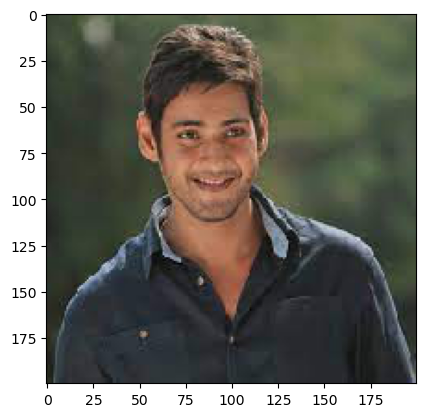

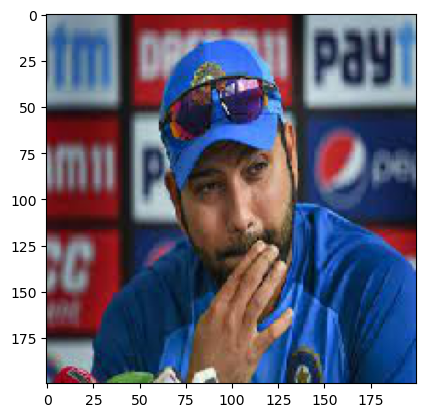

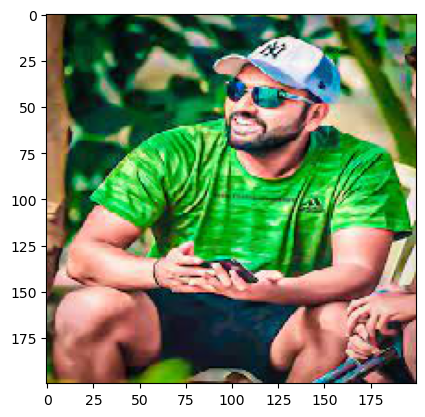

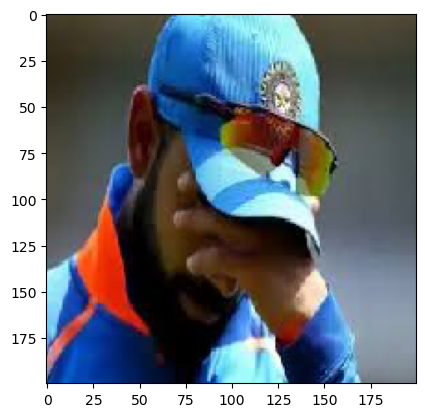

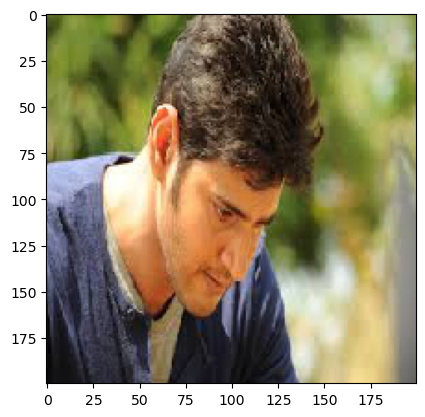

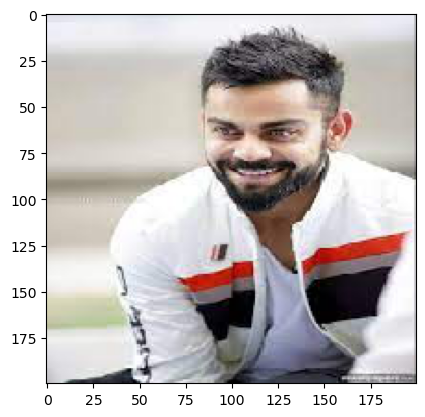

In [36]:
dir_path=r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\testing"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+"//"+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()

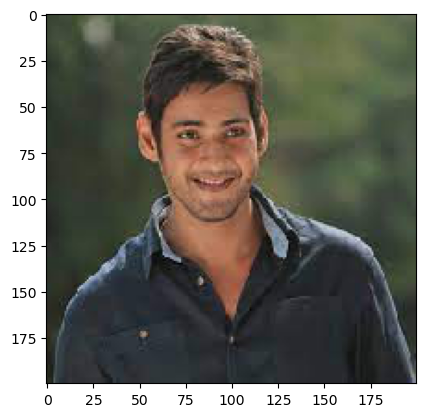

1/1 [==============================] - 0s 160ms/step
iam  happy


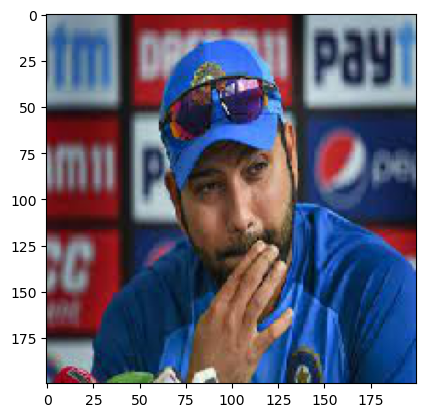

1/1 [==============================] - 0s 38ms/step
iam not happy


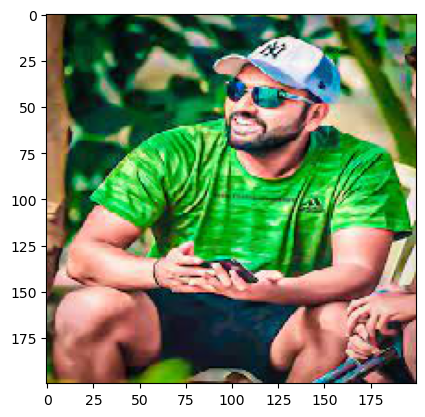

1/1 [==============================] - 0s 42ms/step
iam  happy


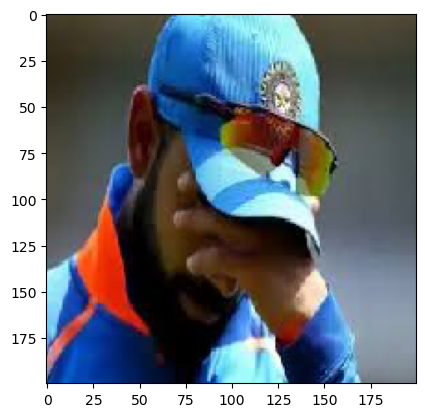

1/1 [==============================] - 0s 39ms/step
iam not happy


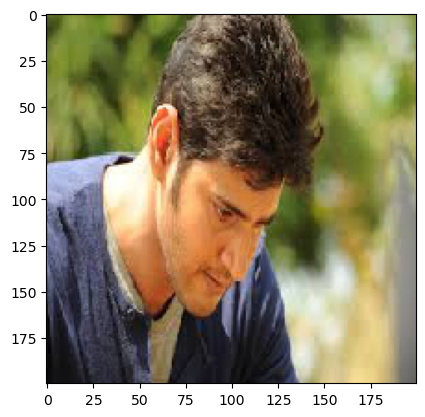

1/1 [==============================] - 0s 44ms/step
iam not happy


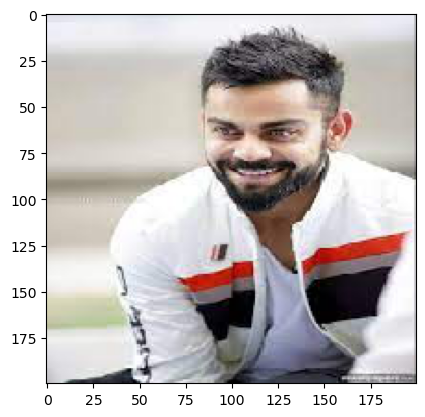

1/1 [==============================] - 0s 38ms/step
iam  happy


In [37]:
dir_path=r"H:\Sandeep\DATA SCIENCE\PSP-CNN\Image classifying using Max pooling [CNN]\testing"
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    images=np.vstack([x])
    val=model.predict(images)
    if val==0:
        print("iam  happy")
    else:
        print("iam not happy")